In [18]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
import json 
import nltk 
from tensorflow import keras 
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPool1D, Flatten
from keras.models import Model


In [19]:
with open('intents.json') as content:
    data = json.load(content)


In [21]:
tags = []
inputs = []
responses = {}

for intent in data['intents']:
    responses[intent['intent']] = intent['responses']
    for lines in intent['text']:
        inputs.append(lines)
        tags.append(intent['intent'])


In [22]:
responses

{'Greeting': ['Hi human, please tell me your GeniSys user',
  'Hello human, please tell me your GeniSys user',
  'Hola human, please tell me your GeniSys user'],
 'GreetingResponse': ['Great! Hi <HUMAN>! How can I help?',
  'Good! Hi <HUMAN>, how can I help you?',
  'Cool! Hello <HUMAN>, what can I do for you?',
  'OK! Hola <HUMAN>, how can I help you?',
  'OK! hi <HUMAN>, what can I do for you?'],
 'CourtesyGreeting': ['Hello, I am great, how are you? Please tell me your GeniSys user',
  'Hello, how are you? I am great thanks! Please tell me your GeniSys user',
  'Hello, I am good thank you, how are you? Please tell me your GeniSys user',
  'Hi, I am great, how are you? Please tell me your GeniSys user',
  'Hi, how are you? I am great thanks! Please tell me your GeniSys user',
  'Hi, I am good thank you, how are you? Please tell me your GeniSys user',
  'Hi, good thank you, how are you? Please tell me your GeniSys user'],
 'CourtesyGreetingResponse': ['Great! Hi <HUMAN>! How can I hel

In [24]:
responses['Greeting']

['Hi human, please tell me your GeniSys user',
 'Hello human, please tell me your GeniSys user',
 'Hola human, please tell me your GeniSys user']

In [25]:
data = pd.DataFrame({'inputs':inputs, 'tags':tags})


In [26]:
data


,inputs,tags
0,Hi,Greeting
1,Hi there,Greeting
2,Hola,Greeting
3,Hello,Greeting
4,Hello there,Greeting
...,...,...
138,Can you prove you have a conscious,SelfAware
139,Can you prove you are self-aware please,SelfAware
140,Can you prove you are self aware please,SelfAware
141,Can you prove you have a conscious please,SelfAware


In [27]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
0,hi,Greeting
1,hi there,Greeting
2,hola,Greeting
3,hello,Greeting
4,hello there,Greeting
...,...,...
138,can you prove you have a conscious,SelfAware
139,can you prove you are selfaware please,SelfAware
140,can you prove you are self aware please,SelfAware
141,can you prove you have a conscious please,SelfAware


In [28]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

from keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])


In [29]:
import pickle

pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [30]:
input_shape = X_train.shape[1]
print(input_shape)


9


In [31]:
vocabulary = len(tokenizer.word_index)
print('num of unique words :',vocabulary)
output_length = le.classes_.shape[0]
print('output length :',output_length)


num of unique words : 117
output length : 22


In [32]:
x = Input(shape=(input_shape,))
y = Embedding(vocabulary+1,50)(x)
y = LSTM(50,return_sequences=True)(y)
y = Flatten()(y)
y = Dense(output_length, activation='softmax')(y)
model = Model(x,y)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 9)]               0         
                                                                 
 embedding_1 (Embedding)     (None, 9, 50)             5900      
                                                                 
 lstm_1 (LSTM)               (None, 9, 50)             20200     
                                                                 
 flatten_1 (Flatten)         (None, 450)               0         
                                                                 
 dense_1 (Dense)             (None, 22)                9922      
                                                                 
Total params: 36022 (140.71 KB)
Trainable params: 36022 (140.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
train = model.fit(X_train,y_train,batch_size=32,epochs=200,validation_split=0.1)


Epoch 1/200
4/4 [==============================] - 1s 62ms/step - loss: 3.0882 - accuracy: 0.0703 - val_loss: 3.1220 - val_accuracy: 0.0000e+00
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 3.0761 - accuracy: 0.1719 - val_loss: 3.1502 - val_accuracy: 0.0000e+00
Epoch 3/200
4/4 [==============================] - 0s 6ms/step - loss: 3.0638 - accuracy: 0.1875 - val_loss: 3.1881 - val_accuracy: 0.0000e+00
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 3.0506 - accuracy: 0.2031 - val_loss: 3.2455 - val_accuracy: 0.0000e+00
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 3.0322 - accuracy: 0.1797 - val_loss: 3.3294 - val_accuracy: 0.0000e+00
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 3.0096 - accuracy: 0.1094 - val_loss: 3.4566 - val_accuracy: 0.0000e+00
Epoch 7/200
4/4 [==============================] - 0s 7ms/step - loss: 2.9829 - accuracy: 0.0859 - val_loss: 3.6574 - val_accuracy: 0.0000e+0

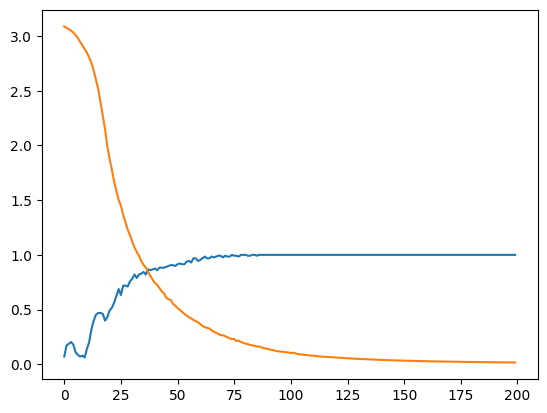

In [34]:
import matplotlib.pyplot as plt 
plt.plot(train.history['accuracy'])
plt.plot(train.history['loss'])


In [35]:
model.save('model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
import random

while True:
    texts_p = []
    prediction_input = input('Your : ')
    user_inp = prediction_input
    # removing Punctuations
    prediction_input = [ltrs.lower() for ltrs in prediction_input if ltrs not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    # tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).ravel()
    prediction_input = pad_sequences([prediction_input],input_shape)

    #getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print('User : ', user_inp)
    print('Bruno : ',random.choice(responses[response_tag]))
    if response_tag == 'goodbye':
        break


1/1 [==============================] - 0s 148ms/step
User :  hi
Bruno :  Hello human, please tell me your GeniSys user
1/1 [==============================] - 0s 12ms/step
User :  i dont know
Bruno :  Fine, sorry to disturb you
1/1 [==============================] - 0s 13ms/step
User :  thanks
Bruno :  No problem!
1/1 [==============================] - 0s 12ms/step
User :  what can you. do
Bruno :  Please look at the camera
1/1 [==============================] - 0s 12ms/step
User :  shh
Bruno :  Hi human, please tell me your GeniSys user
1/1 [==============================] - 0s 12ms/step
User :  can you see me
Bruno :  Let me see
1/1 [==============================] - 0s 12ms/step
User :  who am i
Bruno :  Let me see
1/1 [==============================] - 0s 12ms/step
User :  who are you
Bruno :  You may call me Geni
1/1 [==============================] - 0s 12ms/step
User :  i am bored tell me joke
Bruno :  Cathy said she send him a mail with the subject last mail last word from him.
